<a href="https://colab.research.google.com/github/kellygaioni/ds_by_kelly/blob/main/Na%C3%AFve_Bayes_Dados_desbalanceados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação com dados desbalanceados

In [ ]:
# Resumo:
# Esse código utiliza o algoritimo Naive Bayes para classificar uma base de clientes que pagam ou não emprestimos gerados ao bancos, com
# uma amostra de dados desbalanceados. Logo após, é usado os métodos de underdampling e oversamçpling para balancear a amortra e
# reduzir as perdas financeiras para o banco com a maior acurária do algoritimo ára o público que paga o emprestimo e apontados com o oposto
# pelo Neive Bayes

## Carregamento da base de dados

In [ ]:
import pandas as pd
import random
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('credit_data.csv')

In [ ]:
dataset.shape

(2000, 5)

In [ ]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [ ]:
# Para rodar o Naive Bayes, não pode ter valores nulos na base.
# o comando inplace=True é usado para já limpar e atualizar a própria base
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

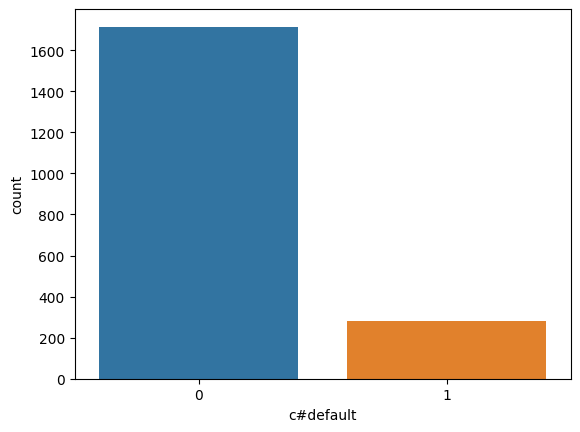

In [ ]:
import seaborn as sns
sns.countplot(x=dataset['c#default']);

# Os dados estão desbalanceados, temos a maioria dos dados com 0 (pessoas q pagam o emprestimo)
# Como o algoritimo usa probabilidade/estatisca, ele pode não aprender tão bem e ficar inviesado para o 0
# Para evitar isso, vamos separar as bases de dados em outras variáveis para contornar esses dados desbalanceados

In [ ]:
# No X colocamos as variáveis previsoras, que no caso são os dados: income,	age e	loan
X = dataset.iloc[:, 1:4].values

In [ ]:
X.shape

(1997, 3)

In [ ]:
# No Y colocamos a coluna que quemos ensinar o algoritimo a predizer
y = dataset.iloc[:, 4].values

In [ ]:
y.shape

(1997,)

## Base de treinamento e teste

In [ ]:
# Biblioteca para levantar a amostragem estratificada
from sklearn.model_selection import train_test_split

In [ ]:
# 20% de teste para tentar adivinhar 80% dos dados, e a amostra estará sendo estratificada em Y que está desbalanceada
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, stratify = y)

In [ ]:
X_treinamento.shape, y_treinamento.shape

((1597, 3), (1597,))

In [ ]:
X_teste.shape, y_teste.shape

((400, 3), (400,))

In [ ]:
# Para checar a amostra estratificada, podemos levantar as proporções da base completa e comparar com a base de treinamento
np.unique(y, return_counts=True), 1714 / len(dataset), 283 / len(dataset)

# A primeira função retorna os registros exclusivas na base y e qts registros cada um tem na base, e se dividirmos pelo total,
# vamos verificar que o 0 (pessoas quw pagam as dívidas) representa 85% da base, e as pessoas que não pagam, 15%

((array([0, 1]), array([1714,  283])), 0.8582874311467201, 0.14171256885327993)

In [ ]:
# Logo, como usamos o método train_test_split com amostra estartificada, esperamos que a nossa base de treinamento tenha a mesma proporção
# E de fato, podemos observar essa proporção:

np.unique(y_treinamento, return_counts=True), 1371 / len(y_treinamento) , 226 / len(y_treinamento)

((array([0, 1]), array([1371,  226])), 0.8584846587351284, 0.14151534126487164)

In [ ]:
# Na base de teste, também:

np.unique(y_teste, return_counts=True), 343 / len(y_teste) , 57 / len(y_teste)

((array([0, 1]), array([343,  57])), 0.8575, 0.1425)

## Classificação com Naïve Bayes

In [ ]:
# Importando o algoritimo do naive bayes
from sklearn.naive_bayes import GaussianNB

In [ ]:
# A primeira coisa que fazemos nesse algoritimo é a criação da tabela de probabilidades, que é usando especificamente o .fit nas
# bases de treinamento. Aqui no python não conseguimos vizualizar a tabela de probabilidade
modelo = GaussianNB()
modelo.fit(X_treinamento, y_treinamento)

GaussianNB()

In [ ]:
# Uma vez o modelo de probabilidade criado, podemos realizar as previsões na base de teste.
# Ou seja, o modelo é feito na base de treinamento e é usado estatiscamente para prever a base de teste
previsoes = modelo.predict(X_teste)

In [ ]:
# Uma vez feito o modelo e as previsões, precisamos calcular o tanto que o modelo "acertou"
from sklearn.metrics import accuracy_score
accuracy_score(y_teste,previsoes)

0.9225

In [ ]:
# Também podemos olhar uma matriz de confusão para analisar os resultados

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste,previsoes)
cm

array([[338,   5],
       [ 26,  31]])

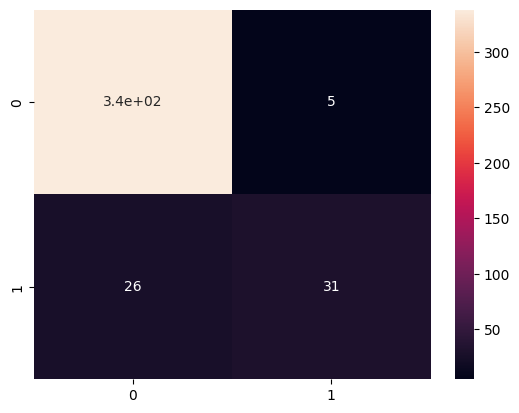

In [ ]:
# Para termos a mesma visualização da matris de confusão, porém, em cores, conseguimos usar o método abaixo
# 0 338 é quando o cliente = 0 e o algotimo aponto cliente = 0 - Algoritmo acerta
# 0 5 é quando o cliente = 1 e o algotimo aponto cliente = 0
# 0 26 é quando o cliente = 1 e o algotimo aponto cliente = 0
# 0 31 é quando o cliente = 1 e o algotimo aponto cliente = 1 - Algoritmo acerta

# O "pior" erro é quando o algorito aponta como o cliente que vai pagar o emprestimo (0) mas na verdade eke está como 1 devedor,
# que teve apenas 5 erros "crítico"

sns.heatmap(cm, annot=True);

In [ ]:
# Para fazer a acuracia total na mão, é só somar a quantidade de acertos e dividir pelo total
(336 + 32) / (336 + 25 + 7 + 32)

0.92

In [ ]:
# Percentual de acerto para pessoas que pagam o empréstimo
336 / (336 + 25)

0.9307479224376731

In [ ]:
# Percentual de acerto para pessoas que não pagam o empréstimo
32 / (32 + 7)

0.8205128205128205

In [ ]:
# Como a classe de pessoal q pagam o emprestimo é maior, o algoritmo tem mais facilidade de acertar (93%), diferente da classe 1 de pessoas
# que não pagam o emprestimo, com diferença se quase 10%, e esse comportamento é bem comum com dados desbalanceados

In [ ]:
# Exemplo: O banco usa esse algoritimo para ceder emprestimo a clientes. A perda financeira estimada para cada cliente que não paga o emprestimo
# é de 5 mil reais, e hoje, a base de dados desse banco é de 1mil clientes que não pagaram.
# Dentro do público que não pagam o emprestimo, temos a probabilidade de acerto em 82%. Logo, 18% são clientes que pegariam o emprestimo e o
# nosso algoritimo está negando o emprestimo para esses clientes. Na conta abaixo podemos notar que, de 1000 clientes, 180 clientes pagariam o
# emprestimo, mas o algotimo erra e gera perda de receita de 900 mil para o banco

# Precisamos tentar reduzir essas perdas

# Perdas: 5.000
# Clientes não pagadores: 1.000
1000 * 18 // 100 , 180 * 5000

(180, 900000)

## Subamostragem (undersampling) - Tomek links

- https://imbalanced-learn.org/stable/introduction.html

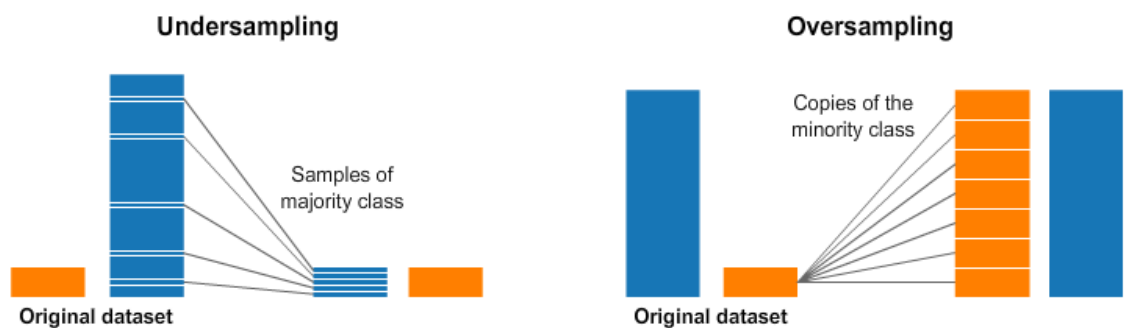

In [ ]:
# Undersampling basicamente é quando a gente pega a classe majoritária de dados e reduz ela ao tamanho da classe menor, e os dados não são
# escolhidos de formas aleatórios, eles são escolhidos por similaridade. Quando há muito desproporcionalidade entre as classes, nesse
# método, podemos perder alguns dados da classe majoritária o reduzí-la.
# O algoritimo mais conhecido para subamostra é o TomekLinks

In [ ]:
from imblearn.under_sampling import TomekLinks

In [ ]:
# Aqui está o método que faz de fato essa selação e a diminuição da claasse majoritária e aplicamos na base inteira inicial x e y
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(X, y)

In [ ]:
# Observa-se que a amostra reduziu
X_under.shape, y_under.shape

((1897, 3), (1897,))

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [ ]:
np.unique(y_under, return_counts=True)

(array([0, 1]), array([1614,  283]))

In [ ]:
# Gerando amostragem estartificada novamente, com 20% de teste tentando advinhar 80% da base
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(X_under,
                                                                          y_under,
                                                                          test_size=0.2,
                                                                          stratify=y_under)
X_treinamento_u.shape, X_teste_u.shape

((1517, 3), (380, 3))

In [ ]:
# Recriando a base de probabilidades (modelo) e as previsoes na base de teste, e calculando a acurácia do modelo
modelo_u = GaussianNB()
modelo_u.fit(X_treinamento_u, y_treinamento_u)
previsoes_u = modelo_u.predict(X_teste_u)
accuracy_score(y_teste_u,previsoes_u )

# De forma geral, aumentamos 1% na acurácia

0.9315789473684211

In [ ]:
# Porém, a matriz de confusão retorna um pouco diferente os dados
cm_u = confusion_matrix(y_teste_u, previsoes_u)
cm_u

array([[318,   5],
       [ 21,  36]])

In [ ]:
# Percentual de acerto para pessoas que pagam o empréstimo - Reduziu um pouco
315 / (315 + 26)

0.9237536656891495

In [ ]:
# Percentual de acerto para pessoas que não pagam o empréstimo
# Reduziu bastante, com o modelo de undersampling, nós aumentamos as perdas para o banco, logo, esse modelo não é recomendado para a nossa base
31 / (31 + 8)

0.7948717948717948

## Sobreamostragem (oversampling) - SMOTE

In [ ]:
# Oversampling basicamente é quando a gente pega a classe minoritária de dados e aumenta ela ao tamanho da classe maio, e os dados não são
# escolhidos de formas aleatórios, eles são escolhidos por similaridade e é criado uma base fake com dados próximos.
# O algoritimo mais conhecido para subamostra é o SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Aqui está o método está aumentando a amostra minoritária, criando dados similares
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X, y)

In [ ]:
# Aqui, a base aumenta
X_over.shape, y_over.shape

((3428, 3), (3428,))

In [ ]:
# Na base original, a gente observa a desproporcionalidade entre as classes
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [ ]:
# E na base com aplicação do método over, as duas bases possuem o mesmo tamanhp
np.unique(y_over, return_counts=True)

(array([0, 1]), array([1714, 1714]))

In [ ]:
# Gerando amostragem estartificada novamente, com 20% de teste tentando advinhar 80% da base
X_treinamento_o, X_teste_o, y_treinamento_o, y_teste_o = train_test_split(X_over, y_over,
                                                                          test_size = 0.2,
                                                                          stratify=y_over)

In [ ]:
X_treinamento_o.shape, X_teste_o.shape

((2742, 3), (686, 3))

In [ ]:
# Recriando a base de probabilidades (modelo) e as previsoes na base de teste, e calculando a acurácia do modelo
modelo_o = GaussianNB()
modelo_o.fit(X_treinamento_o, y_treinamento_o)
previsoes_o = modelo_o.predict(X_teste_o)
accuracy_score(y_teste_o, previsoes_o)

# De forma geral, a mesma acurácia

0.924198250728863

In [ ]:
cm_o = confusion_matrix(previsoes_o, y_teste_o)
cm_o

array([[303,  12],
       [ 40, 331]])

In [ ]:
# Percentual de acerto para pessoas que pagam o empréstimo - Aumentou bem
331 / (331 + 12)

0.9650145772594753

In [ ]:
# Percentual de acerto para pessoas que não pagam o empréstimo - Aumentou, chegando em quase 89%
303 / (303 + 40)

0.8833819241982507

In [ ]:
# Recalculando as perdas para o banco, podemos observar que só com esse ajuste de amostra com balanceamento de oversampling, reduzimos as perdas
# do banco de 900mil para 550mil, uma queda de quase 40%

# Perdas: 5.000
# Cliente não pagadores: 1.000
1000 * 11 // 100,  1000 * 11 / 100  * 5000




(110, 550000.0)